# Центральная предельная теорема своими руками

Проверим ЦПТ на примере [бета - распределения](https://ru.wikipedia.org/wiki/Бета-распределение).

### Часть 1
Сгенерируем из этого распределения выборку объёма 1000, построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения нашей случайной величины.

In [1]:
#Сначала импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import beta
from math import sqrt
%matplotlib inline

In [2]:
#Зададим параметры a и b, которые задают бета - распределение
a0, b0 = 2.31, 0.627

#Теперь генерируем выборку объема 1000
sample = beta.rvs(a0, b0, size=1000)
print(sample)
print("Mean of the sample: ", sample.mean())

[0.83256926 0.58802995 0.99760532 0.47551777 0.78118619 0.59126809
 0.20985938 0.99906269 0.77338446 0.939798   0.8382309  0.88620925
 0.6910434  0.86035472 0.57496406 0.61784707 0.60324849 0.81791412
 0.87816962 0.90155471 0.98989897 0.9033214  0.91372013 0.97142621
 0.63474132 0.91340431 0.89113608 0.76545397 0.98161753 0.42623389
 0.49520505 0.91277295 0.96049401 0.82382317 0.90210041 0.70754314
 0.80729733 0.99650948 0.46326023 0.995066   0.96078459 0.98374222
 0.22489369 0.83592233 0.79961912 0.96091431 0.21960351 0.96044324
 0.91362777 0.85693103 0.94217798 0.51136163 0.98768004 0.99736789
 0.52514837 0.95545897 0.79756315 0.8600055  0.82072513 0.75031742
 0.99892419 0.92949562 0.96343992 0.99934447 0.75203286 0.9544832
 0.92857904 0.51858592 0.90115171 0.57521595 0.46193081 0.74644626
 0.9478028  0.70783311 0.67739058 0.97744956 0.98368799 0.66463472
 0.20775296 0.34778234 0.92409125 0.8887812  0.93990416 0.20770876
 0.35743919 0.52864616 0.52760644 0.78169468 0.96438219 0.71952

Построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения нашей случайной величины.

Mean of the theoretical distribution 0.7865168539325842


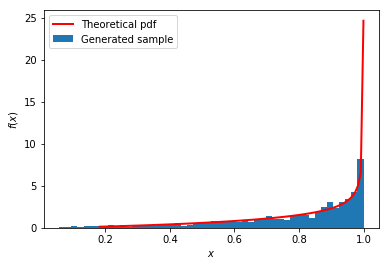

In [3]:
#Теперь зададим теоретическую плотность распределения и нарисуем ее
x = np.linspace(beta.ppf(0.01, a0, b0), beta.ppf(0.99, a0, b0), 100)
pdf = beta.pdf(x, a0, b0)
mean = beta.stats(a0, b0, moments='m')
print("Mean of the theoretical distribution", mean)
plt.plot(x, pdf, 'r-', lw=2, label='Theoretical pdf')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

#Тут же рисуем гистограмму распределения сгенерированной выборки
plt.hist(sample, bins=50, density=True, label='Generated sample')
plt.legend()

### Часть 2
Проверяем ЦПТ

Так как для бета - распределения $E[x] = \frac{a}{a+b}$, а $D[x] = \frac{ab}{(a+b)^2(a+b+1)}$, подберем другие $a$ и $b$ для удобства подсчета мат. ожидания и дисперсии:

In [4]:
a = 0.5
b = 0.5

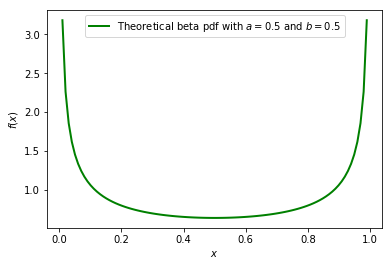

In [5]:
#Изобразим распределение при данных параметрах
x = np.linspace(0, 1, 100)
pdf = beta.pdf(x, a, b)
plt.plot(x, pdf, 'g-', lw=2, label='Theoretical beta pdf with $a=0.5$ and $b=0.5$')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()

In [6]:
#Вычисляем мат. ожидание и дисперсию с заданными параметрами для теоретически заданного бета - распределения
#Вычислим с помощью встроенных методов
E_beta, D_beta = beta.stats(a, b, moments='mv')
print("E_beta = ", E_beta)
print("D_beta = ", D_beta)

#Вычислим на всякий случай с помощью формул и сравним
E_check = a/(a+b)
D_check = (a*b)/((a+b)*(a+b)*(a+b+1))

if E_check == E_beta:
    print("OK")

if D_check == D_beta:
    print("OK")

E_beta =  0.5
D_beta =  0.125
OK
OK


Дана случайная величина с бета-распределением объема N = 5, 10, 50, 100, 200, 500, 1000. Проводим эксперимент 1000 раз и считаем выборочные средние. Таким образом, получаем распределения выборочных средних для выборок разных объемов.

In [7]:
#Напишем функцию для хранения выборочных средних для соответствующих объемов выборок
def find_mean(mean, n, a, b):
    for i in range(1000):
        sample = beta.rvs(a, b, size=n) #Генерируем выборку
        mean.append(sample.mean()) #Храним среднее соответствующей выборки
 
#Функция для вычисления standart deviation
def std_deviation(n):
    return sqrt(D_beta/n) #Корень, так как в sci.py метод норм на вход принимает standart deviation 

In [8]:
#Объемы выборок
N = [5, 10, 50, 100, 200, 500, 1000] 

#Массивы для хранения средних для соответствующих объемов выборок
Means = [[] for i in range(len(N))]

for j in range(len(N)):
    find_mean(Means[j], N[j], a, b)
    print("N = ", N[j])
    print("M = ", E_beta) #Теоретическое мат. ожидание
    print("D = ", std_deviation(N[j])) #Теоретическое среднеквадратичное отклонение
    print()

N =  5
M =  0.5
D =  0.15811388300841897

N =  10
M =  0.5
D =  0.11180339887498948

N =  50
M =  0.5
D =  0.05

N =  100
M =  0.5
D =  0.035355339059327376

N =  200
M =  0.5
D =  0.025

N =  500
M =  0.5
D =  0.015811388300841896

N =  1000
M =  0.5
D =  0.011180339887498949



In [9]:
#Рисуем 
def plot(j):
    x = np.linspace(min(Means[j]),max(Means[j]),1000)
    plt.plot(x, sts.norm(E_beta, std_deviation(N[j])).pdf(x), lw=2, label='Theoretical pdf')
    #Гистограммы
    plt.hist(Means[j], bins=15, density=True,  ec='black', label='Generated sample')
    plt.title('Mean of {}'.format(N[j]))
    plt.ylabel('Events')
    plt.xlabel('$\overline{X_n}$') 
    plt.legend()
    plt.show()

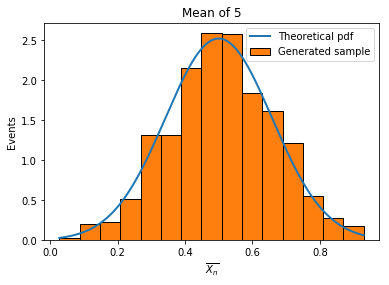

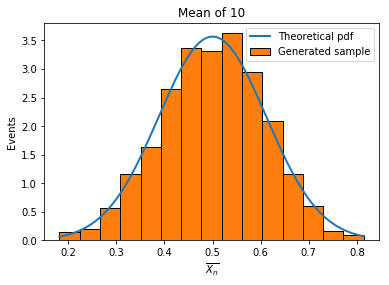

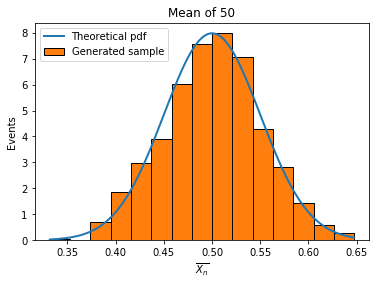

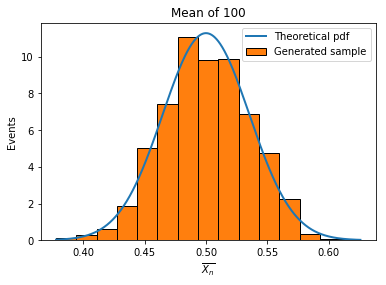

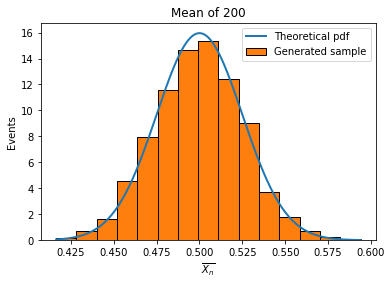

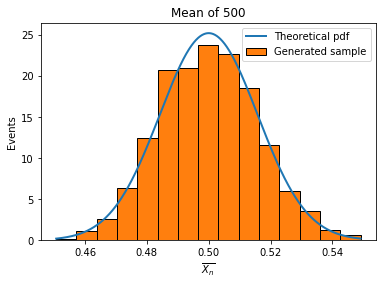

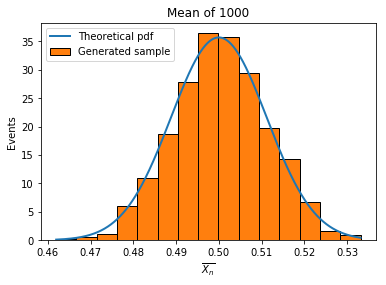

In [10]:
for i in range(len(N)):
    plot(i)

Text(0.06,0.5,'Events')

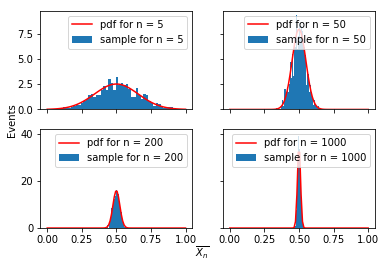

In [11]:
#А теперь все на одной картинке для наглядности
#Зададим теоретическую нормальную плотность распределения для некоторых объемов выборки
norm_rv_1 = sts.norm(E_beta, std_deviation(N[0]))
norm_rv_2 = sts.norm(E_beta, std_deviation(N[2]))
norm_rv_3 = sts.norm(E_beta, std_deviation(N[4]))
norm_rv_4 = sts.norm(E_beta, std_deviation(N[6]))
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, norm_rv_1.pdf(x),  color='r', label='pdf for n = %s' % N[0])
ax1.hist(np.array(Means[0]), bins=50, density=True, label='sample for n = %s' % N[0])
ax1.legend()

ax2.plot(x, norm_rv_2.pdf(x),  color='r', label='pdf for n = %s' % N[2])
ax2.hist(np.array(Means[2]), bins=50, density=True, label='sample for n = %s' % N[2])
ax2.legend()

ax3.plot(x, norm_rv_3.pdf(x),  color='r', label='pdf for n = %s' % N[4])
ax3.hist(np.array(Means[4]), bins=50, density=True, label='sample for n = %s' % N[4])
ax3.legend()

ax4.plot(x, norm_rv_4.pdf(x),  color='r', label='pdf for n = %s' % N[6])
ax4.hist(np.array(Means[6]), bins=50, density=True, label='sample for n = %s' % N[6])
ax4.legend()

f.text(0.5, 0.04, '$\overline{X_n}$', ha='center', va='center')
f.text(0.06, 0.5, 'Events', ha='center', va='center', rotation='vertical')



### Выводы
Данный эксперимент показал, что распределение выборочных средних принимает форму гаусса, причем ширина с ростом объема выборки $n$ сужается. Это также подтверждается построением соответствующих плотностей нормального распределения. Таким образом, мы экспериментально продемонстрировали работу ЦПТ. 